In [ ]:
# displays output inline
%matplotlib inline

##This code uses 79 features to fit a machine learning model to predict SalePrice using scikit-learn and seaborn.

## Import Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('HW1_house_price_regression.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Cleaning and Selection


In [ ]:
# Change the numeric variables to categorical variables
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['OverallQual'] = df['OverallQual'].astype(str)
df['OverallCond'] = df['OverallCond'].astype(str)
# Convert NA value to character
df['Alley'] = df['Alley'].fillna('NaN')
df['BsmtQual'] = df['BsmtQual'].fillna('NaN')
df['BsmtCond'] = df['BsmtCond'].fillna('NaN')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NaN')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NaN')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NaN')
df['FireplaceQu'] = df['FireplaceQu'].fillna('NaN')
df['GarageType'] = df['GarageType'].fillna('NaN')
df['GarageFinish'] = df['GarageFinish'].fillna('NaN')
df['GarageQual'] = df['GarageQual'].fillna('NaN')
df['GarageCond'] = df['GarageCond'].fillna('NaN')
df['PoolQC'] = df['PoolQC'].fillna('NaN')
df['Fence'] = df['Fence'].fillna('NaN')
df['MiscFeature'] = df['MiscFeature'].fillna('NaN')

### Visualize the Correlations of Numeric Variables

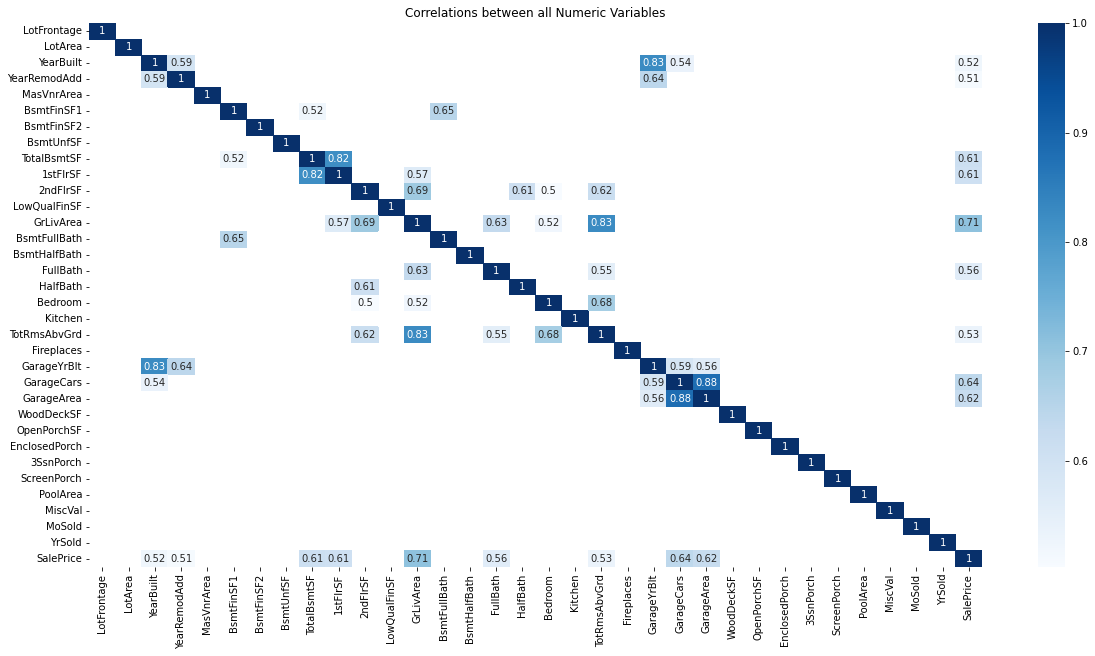

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
# Correlation of Numeric Variables
corr = df.corr()
# Choose the values that over 0.5, so only variables with high correlation will be shown
hcor = corr[abs(corr)>=.5]
plt.figure(figsize=(20,10))
sn.heatmap(hcor, annot=True, cmap="Blues")
plt.title('Correlations between all Numeric Variables')
plt.show()

From correlation plot, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea are numeric variables which have high correlation with SalePrice. However, the variables TotalBsmtSF and 1stFlrSF; TotRmsAbvGrd and GrLivArea; GarageCars and GarageArea also have very high correlation with each other, so removing 1stFlrSF, TotRmsAbvGrd and GarageArea from analysis.
In addition to the numeric variables, assuming that all categorical variables are useful features in the regression analysis.

### Make a New Data Frame

In [ ]:
# Select all categorical variables
df.categ = df.select_dtypes(include=['object'])
# Select numeric variables with high correlation and target
df.num = df[['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars', 'SalePrice']]
# Make a new data frame
df.new = pd.merge(df.categ, df.num, on = 'Id')
df.new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,2003,2003,856,1710,2,2,208500
2,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,1976,1976,1262,1262,2,2,181500
3,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,2001,2002,920,1786,2,2,223500
4,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,1915,1970,756,1717,1,3,140000
5,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,2000,2000,1145,2198,2,3,250000


### Transform Catagorical Variables to Dummy Variables

In [ ]:
# Create dummy variables
dm = pd.get_dummies(df.new)
dm.head()

,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NaN,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NaN,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_NaN,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NaN,MiscFeature_Gar2,MiscFeature_NaN,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2003,2003,856,1710,2,2,208500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1976,1976,1262,1262,2,2,181500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2001,2002,920,1786,2,2,223500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1915,1970,756,1717,1,3,140000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,2000,2000,1145,2198,2,3,250000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Check Missing Data

In [ ]:
# Check for missing values
num_miscol = 0
for n in range(0, len(dm.columns)):
  if dm.isnull().sum()[n] != 0:
    print("%s: %s" % (dm.columns[n], dm.isnull().sum()[n]))
    num_miscol += 1
if num_miscol == 0:
  print('There is no column with missing value.')
elif num_miscol == 1:
  print('There is %s column with missing value.' % num_miscol)
else:
  print('There are %s columns with missing value.' % num_miscol)

There is no column with missing value.


##  Machine Learning Model

### Create Train Set and Test Set

In [ ]:
# Separate dataframe into target and data 
target = dm['SalePrice']
data = dm.iloc[:, dm.columns != 'SalePrice']
from sklearn.model_selection import train_test_split
# Split the data and target into training and validation sets
data_train, data_valid, target_train, target_valid = train_test_split(data, target, test_size=0.3, random_state=1)
# Verify sizes
print("\nTraining Data = %s\nValidation Data = %s" % (data_train.shape, data_valid.shape))
print("Training Target = %s\nValidation Target = %s" % (target_train.shape, target_valid.shape))


Training Data = (1022, 306)
Validation Data = (438, 306)
Training Target = (1022,)
Validation Target = (438,)


### Multiple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
# create mlr model
mlr = LinearRegression()
# fit the training data
mlr.fit(data_train, target_train)

LinearRegression()

In [ ]:
# R-squared
print("R2 for training = %.5f" % mlr.score(data_train, target_train))
print("R2 for validation = %.5f" % mlr.score(data_valid, target_valid))

R2 for training = 0.92745
R2 for validation = 0.88666


In [ ]:
import math
# RMSE for train set
pred_train = mlr.predict(data_train)
SE_train = (pred_train - target_train) ** 2
MSE_train = SE_train.mean()
RMSE_train = math.sqrt(MSE_train)

# RMSE for test set
pred_test = mlr.predict(data_valid)
SE_test = (pred_test - target_valid) ** 2
MSE_test = SE_test.mean()
RMSE_test = math.sqrt(MSE_test)

print("RMSE for training = %.5f" % RMSE_train)
print("RMSE for test = %.5f" % RMSE_test)

RMSE for training = 20774.54347
RMSE for test = 28447.97683
